In [4]:
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 

import statsmodels.api as sm 
from statsmodels.formula.api import ols

In [5]:
datasets = sm.datasets.get_rdataset('iris').data

In [6]:
# Check wheather the columns contains . or not if yes then replace this with

datasets.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

In [10]:
datasets.columns = [data.replace('.', '_') for data in datasets.columns] 

In [11]:
datasets.columns

Index(['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width',
       'Species'],
      dtype='object')

In [14]:
mean_data = datasets.groupby('Species').mean().reset_index()
print("Mean Data", mean_data)

Mean Data       Species  Sepal_Length  Sepal_Width  Petal_Length  Petal_Width
0      setosa         5.006        3.428         1.462        0.246
1  versicolor         5.936        2.770         4.260        1.326
2   virginica         6.588        2.974         5.552        2.026


In [15]:
std_data = datasets.groupby('Species').std().reset_index()
print("Std Data: ", std_data)

Std Data:        Species  Sepal_Length  Sepal_Width  Petal_Length  Petal_Width
0      setosa      0.352490     0.379064      0.173664     0.105386
1  versicolor      0.516171     0.313798      0.469911     0.197753
2   virginica      0.635880     0.322497      0.551895     0.274650


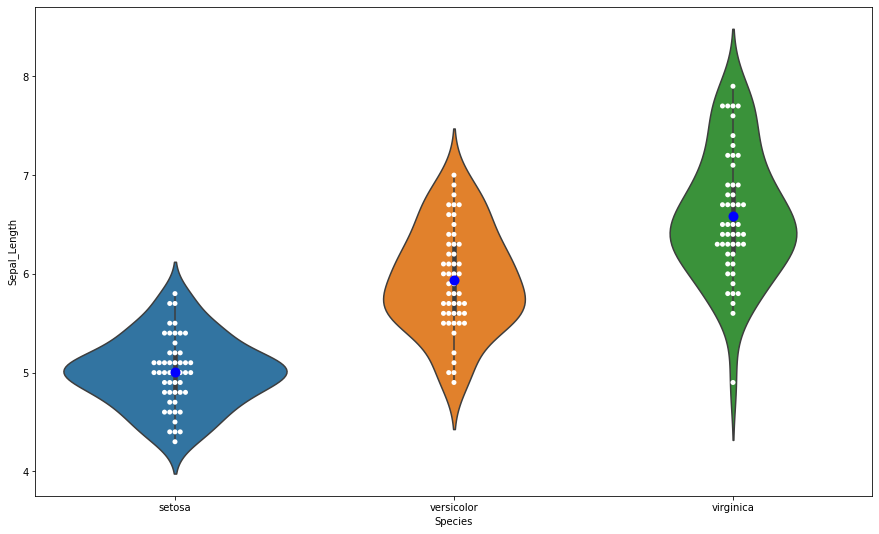

In [29]:
plt.figure(figsize =(15, 9))

ax = sns.violinplot(x = 'Species', y = 'Sepal_Length', data = datasets)
ax = sns.swarmplot(x = 'Species', y = 'Sepal_Length', data = datasets, color = 'white')
ax = sns.swarmplot(x = 'Species', y = 'Sepal_Length', data = mean_data, color = 'b', size = 10)

In [31]:
learning  = ols("Sepal_Width ~ Species ", data = datasets).fit()
sm.stats.anova_lm(learning, typ = 2)

,sum_sq,df,F,PR(>F)
Species,11.344933,2.0,49.16004,4.492017e-17
Residual,16.962000,147.0,NaN,NaN
